# Assignment 2: Classification
# Using Machine Learning Tools

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of classifying data from histological cell images for the diagnosis of malignant breast cancer. This will be presented as a practical scenario where you are approached by a client to solve a problem.  

The main aims of this assignment are: 

- to use the best practice machine learning workflow for producing a solution to a client's problem;
- to visualise data and determine the best pre-processing;
- to create the necessary datasets for training and testing purposes;
- to train and optimise a selection of models, then choose the best;
- to obtain an unbiased measurement of the final model's performance;
- to interpret results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task. Note that some questions require writing a small amount of code, some require graphical results, and some require comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (**with the correct results displayed**) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code runs correctly on the original data file.

Some of the parts of this assignment build on the workflow from the first assignment and that part of the course, and so less detailed instructions are provided for this, as you should be able to implement this workflow now without low-level guidance. A substantial portion of the marks for this assignment are associated with making the right choices and executing this workflow correctly and efficiently. Make sure you have clean, readable code as well as producing outputs, since your coding will also count towards the marks (however, excessive commenting is discouraged and will lose marks, so aim for a modest, well-chosen amount of comments and text in outputs).

This assignment can be solved using methods from [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), and [matplotlib](https://matplotlib.org/stable/index.html) as presented in the workshops. Other libraries should not be used (even though they might have nice functionality) and certain restrictions on sklearn functions will be made clear in the instruction text. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

# Scenario

A client approaches you to solve a machine learning problem for them.  They run a pathology lab that processes histological images for healthcare providers and they have created a product that measures the same features as in the *Wisconsin breast cancer data set* though using different acquisitions and processing methods. This makes their method much faster than existing ones, but it is also slightly noisier. They want to be able to diagnose *malignant* cancer (and distinguish them from *benign* growths) by employing machine learning techniques, and they have asked you to implement this for them.

Their requirements are:
 1) have at least a 95% probability of detecting malignant cancer when it is present;
 2) have no more than 1 in 10 healthy cases (those with benign tumours) labelled as positive (malignant).


 
They have hand-labelled 300 samples for you, which is all they have at the moment.

Please follow the instructions below, which will vary in level of detail, as appropriate to the marks given.

## 1. Investigate Dataset (10% = 3 marks)

In [78]:
# This code imports some libraries that you will need. 
# You should not need to modify it, though you are expected to make other imports later in your code.

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import numpy as np
import time

# Pandas for overview
import pandas as pd

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn import tree
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# Plot setup
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=7)
mpl.rc('xtick', labelsize=6)
mpl.rc('ytick', labelsize=6)
mpl.rc('figure', dpi=240)
plt.close('all')

import seaborn as sns

### 1.1 Load the dataset [0.5 marks]
Do this from the csv file, `assignment2.csv`, as done in assignment 1 and workshops 2 and 3. Extract the feature names and label names for use later on.  Note that we will be treating the _malignant_ case as our _positive_ case, as this is the standard convention in medicine.

**Print out some information (in text) about the data, to verify that the loading has worked and to get a feeling for what is present in the dataset and the range of the values.**

**Also, graphically show the proportions of the labels in the whole dataset.**

In [137]:
# Your code here

df = pd.read_csv('assignment2.csv')

# Extracting feature and label names
data = df.drop(columns=['label'])
label = df['label']

print(f'Features names are: {data.columns}')

print(f'Label names are: label')

Features names are: Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')
Label names are: label


In [138]:
print(df.count())

label                      300
mean radius                300
mean texture               300
mean perimeter             300
mean area                  300
mean smoothness            300
mean compactness           300
mean concavity             300
mean concave points        300
mean symmetry              300
mean fractal dimension     300
radius error               300
texture error              300
perimeter error            300
area error                 300
smoothness error           300
compactness error          300
concavity error            300
concave points error       300
symmetry error             300
fractal dimension error    300
worst radius               300
worst texture              300
worst perimeter            300
worst area                 300
worst smoothness           300
worst compactness          300
worst concavity            300
worst concave points       300
worst symmetry             300
worst fractal dimension    300
dtype: int64


In [139]:
print(np.sum(df.isna()))

label                      0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


In [80]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,14.231808,19.312619,92.727687,664.367372,0.096937,0.106615,0.092591,0.050820,0.182546,0.062841,...,16.460566,25.772128,108.563914,900.644633,0.133424,0.261732,0.282075,0.118146,0.293620,0.084556
std,1.297393,1.572224,8.949937,129.515717,0.005067,0.020819,0.030312,0.014350,0.010754,0.002736,...,1.798202,2.346310,12.500033,209.738842,0.008678,0.063535,0.079831,0.024552,0.025620,0.007427
min,11.560025,15.349270,74.690886,477.371592,0.084651,0.075184,0.050771,0.028701,0.157059,0.057830,...,13.279265,20.144214,87.110184,633.771881,0.110342,0.167098,0.152272,0.066927,0.240341,0.072745
25%,13.356676,18.194791,86.659535,580.383274,0.093305,0.091105,0.069071,0.039507,0.175353,0.060950,...,15.148044,24.058893,99.229249,752.124790,0.127682,0.215767,0.219671,0.098389,0.277676,0.079636
50%,13.976933,19.220652,90.896982,628.004851,0.096722,0.102401,0.084829,0.046744,0.181685,0.062477,...,16.007171,25.689861,105.540619,828.667704,0.133064,0.247022,0.267894,0.115679,0.288994,0.082610
75%,15.103078,20.245660,99.093762,737.444716,0.099995,0.117334,0.107994,0.060606,0.187789,0.064149,...,17.656889,27.333610,116.274995,1011.628413,0.138650,0.298732,0.325278,0.136687,0.305227,0.087645
max,19.090091,26.836291,126.168030,1300.788708,0.114500,0.192880,0.212704,0.105212,0.226448,0.076091,...,22.676185,34.614459,150.353232,1796.820974,0.164583,0.543118,0.635074,0.179794,0.432297,0.128288


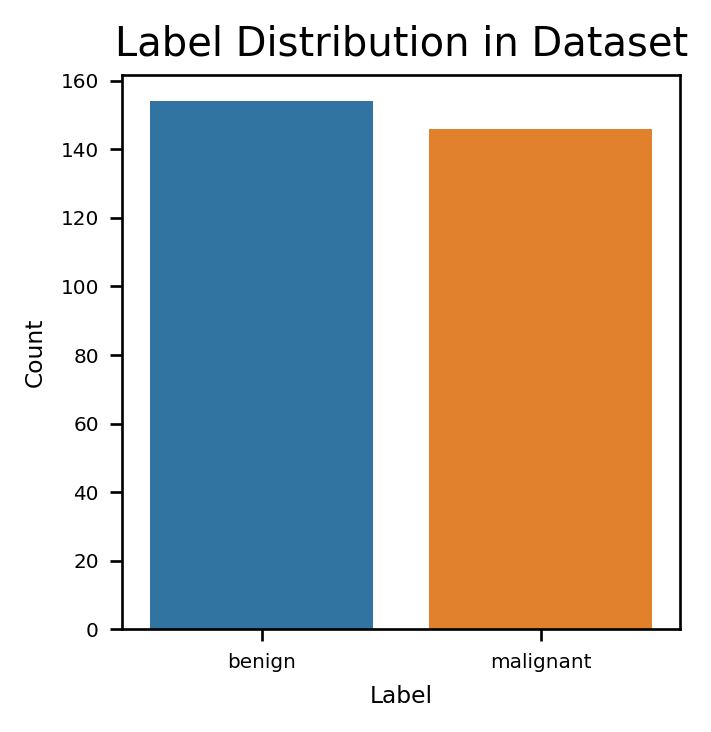

In [82]:
labels = df['label'].value_counts()
plt.figure(figsize=(3, 3))
ax = sns.barplot(x=labels.index, y=labels.values)
plt.title('Label Distribution in Dataset')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

### 1.2 Visualise the dataset [1.5 marks]

As this data is well curated by the client already, you do not need to worry about outliers, missing values or imputation in this case, but be aware that this is the exception, not the rule.

To familiarise yourself with the nature and information contained in the data, display histograms for the data according to the following instructions:
 - **display histograms** for each feature in the _mean_ group, but on _each_ histogram **have the two classes displayed together in one plot** (see example plot below and a code fragment to help you) - and note that your plot does not need to look exactly the example here;
 - **repeat this** for the _standard error_ and _worst_ groups;
 - make sure that in all cases you clearly label the plots and the classes in histograms.

<center><img src="Example_Hist_Plot.png" width="300" alt="Example plot of histogram"></center>

In [83]:
# Define the feature groups
mean_features = [col for col in df.columns if 'mean' in col]
se_features = [col for col in df.columns if 'error' in col]
worst_features = [col for col in df.columns if 'worst' in col]


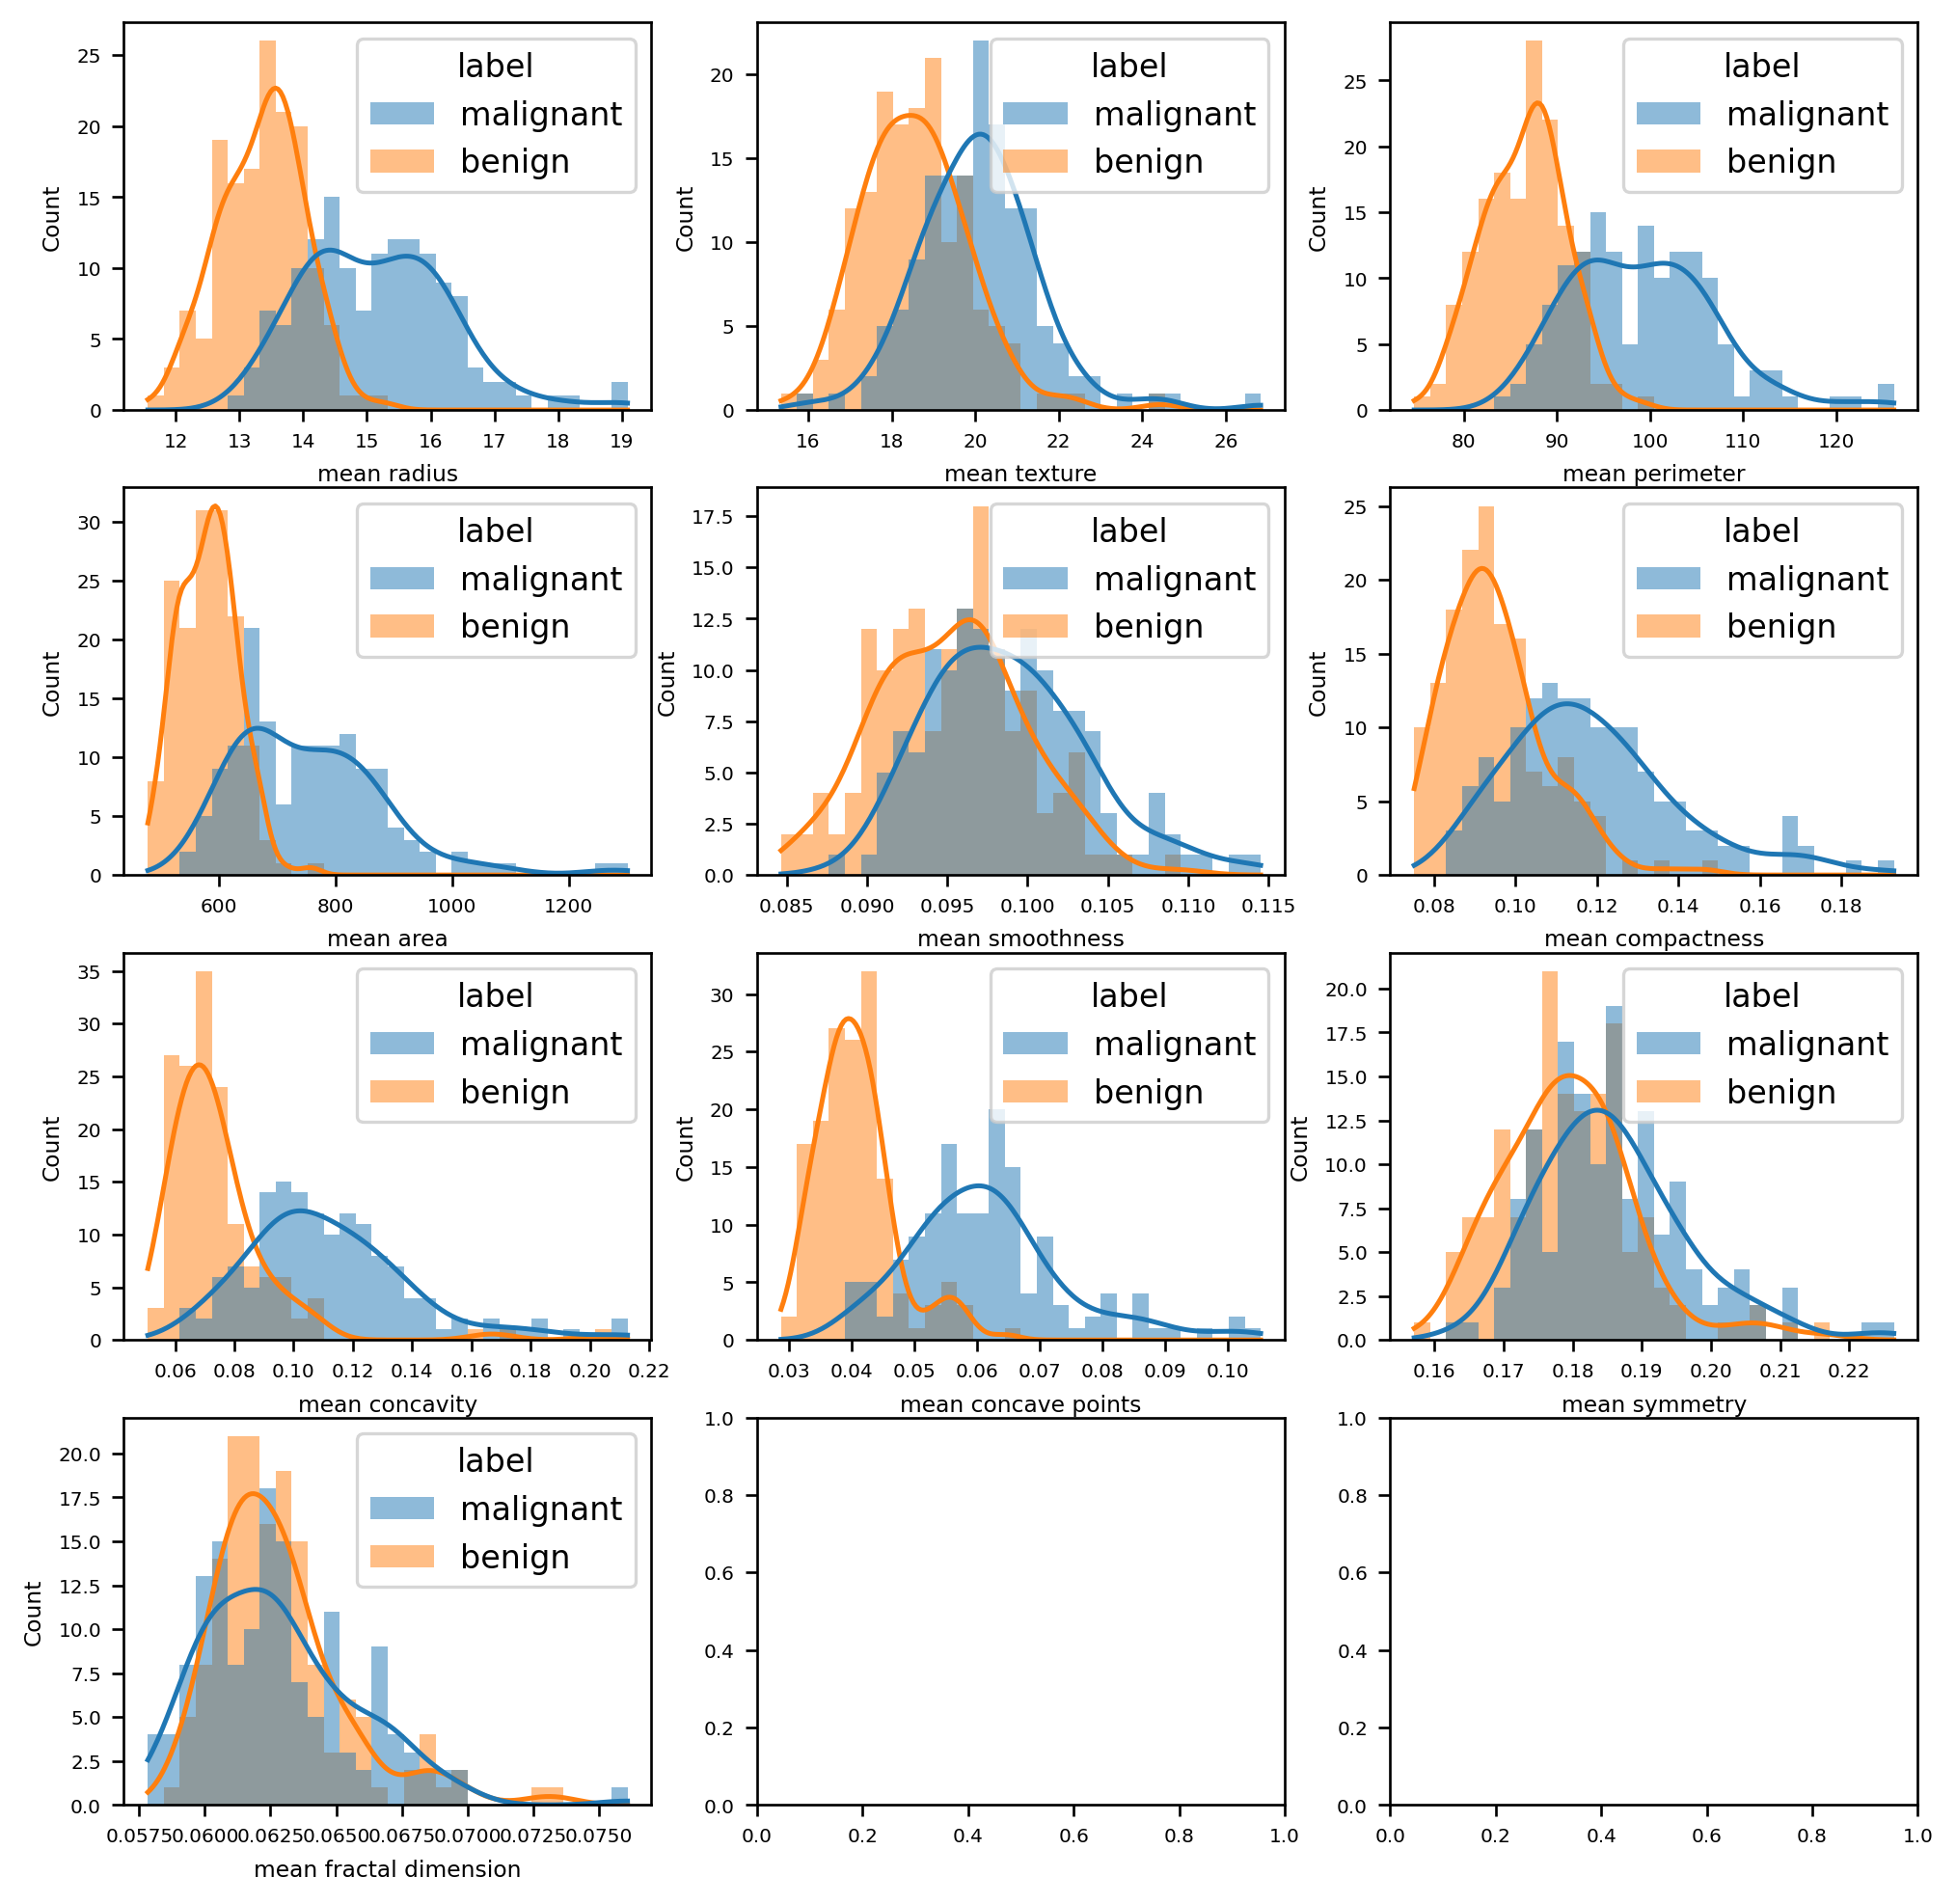

In [84]:
fig, axes = plt.subplots(4, 3, figsize=(10, 10))

for i in range (len(mean_features)):
    row_number = i // 3
    sns.histplot(data=df, x=mean_features[i], hue="label", bins=30, kde=True, ax=axes[row_number][i % 3], edgecolor=None)

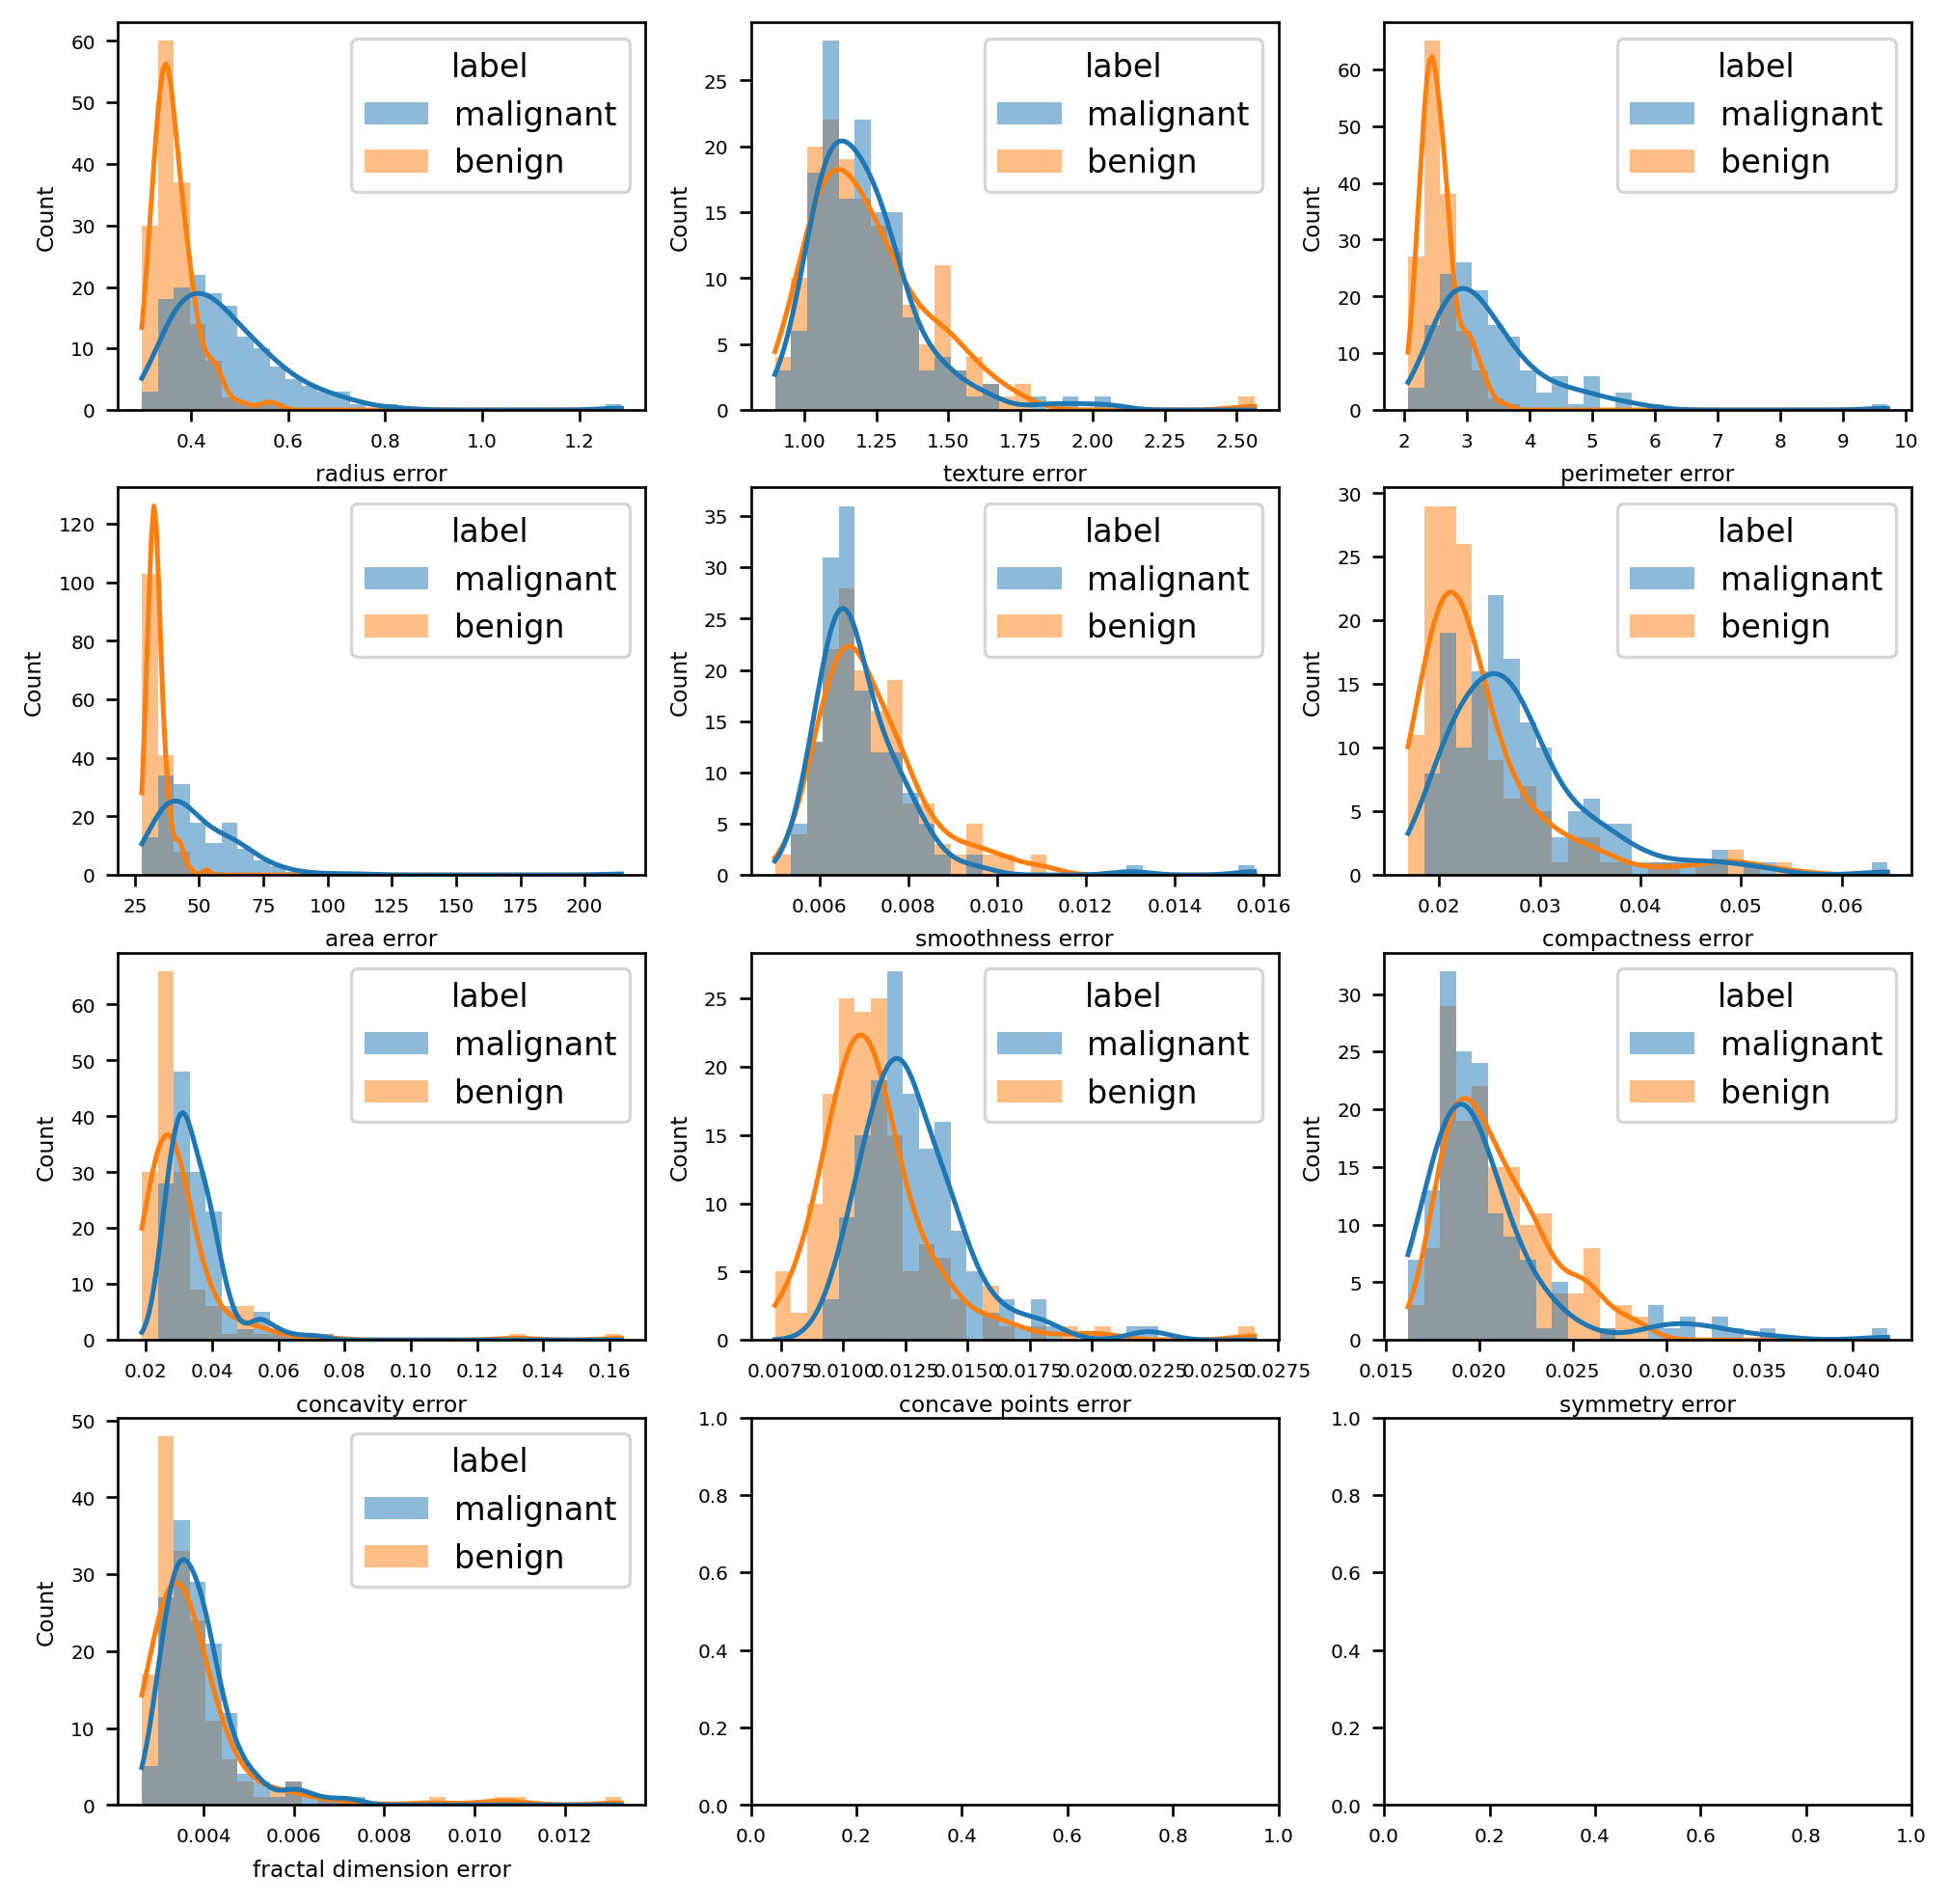

In [85]:
fig, axes = plt.subplots(4, 3, figsize=(10, 10))

for i in range (len(se_features)):
    row_number = i // 3
    sns.histplot(data=df, x=se_features[i], hue="label", bins=30, kde=True, ax=axes[row_number][i % 3], edgecolor=None)

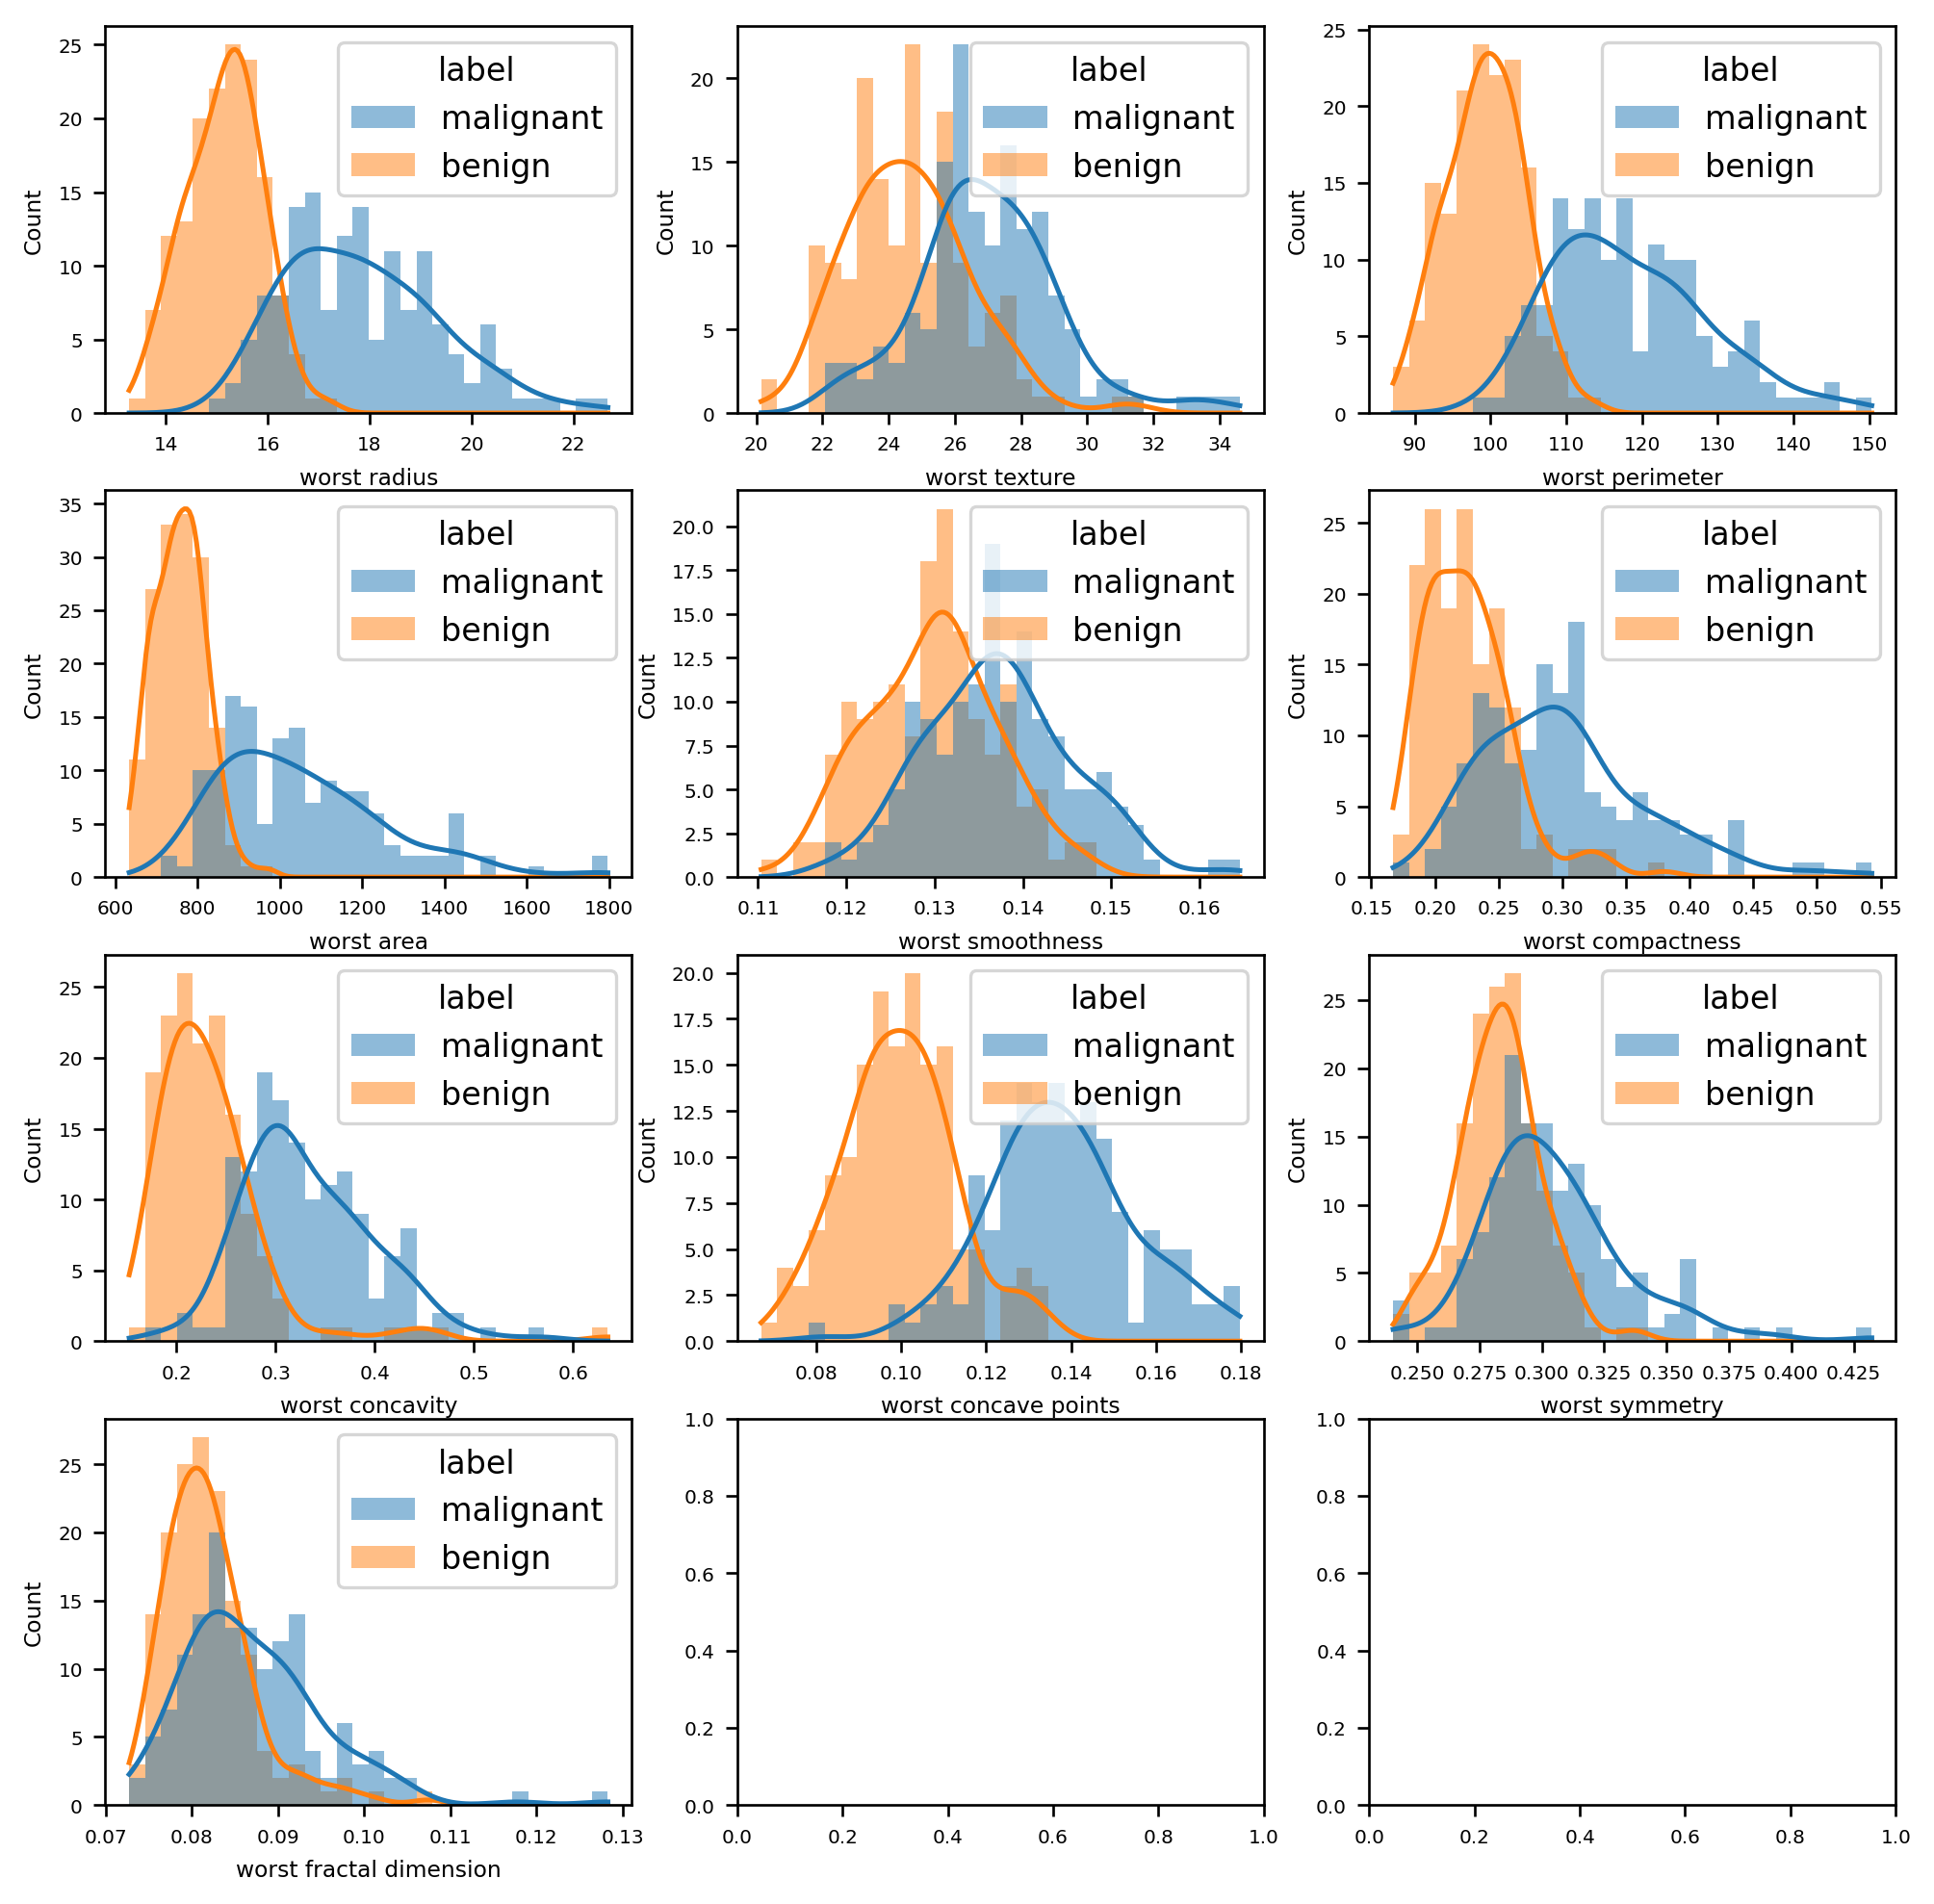

In [86]:
fig, axes = plt.subplots(4, 3, figsize=(10, 10))

for i in range (len(worst_features)):
    row_number = i // 3
    sns.histplot(data=df, x=worst_features[i], hue="label", bins=30, kde=True, ax=axes[row_number][i % 3], edgecolor=None)

### 1.3 Ranking the features [0.5 marks]

**Based on the histograms, which do you think are the 3 strongest features for discriminating between the classes?**

In [87]:
# Your answer here

# features that have the least overlap in their histogram distributions between the two classes could be considered as strong discriminators. 
# This is because these features may have different mean values or different patterns of distribution for different classes, 
# making them potentially powerful in distinguishing the classes.

# Hence, I think the 3 storngest feature for discriminating between the classes is:
# area, concavity and concave points

### 1.4 Splitting the dataset [0.5 marks]

Split the dataset into appropriate subsets. You must choose what the subsets are and how big they are. However, we want to make sure the proportion of the two classes is consistent across all datasets, so use the _stratify_ option, as used in **workshops 5 and 6**. Verify the size and label distribution in each dataset.

In [120]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=['label'])
y = df['label']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Size training set:")
print(X_train.shape)
print("Label distribution in training set:")
print(y_train.value_counts(normalize=True))

print("Size test set:")
print(X_test.shape)
print("Label distribution in test set:")
print(y_test.value_counts(normalize=True))

Size training set:
(240, 30)
Label distribution in training set:
benign       0.5125
malignant    0.4875
Name: label, dtype: float64
Size test set:
(60, 30)
Label distribution in test set:
benign       0.516667
malignant    0.483333
Name: label, dtype: float64


## 2. Build, Train and Optimise Classifiers (60% = 18 marks)

### 2.1 Pipeline [0.5 marks]
**Build a pre-processing pipeline** that includes imputation (as even though we don't strictly need it here it is a good habit to always include it) and other appropriate pre-processing.  

In [89]:
# Your code here
from sklearn.impute import SimpleImputer

preprocessing = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler()),
])

### 2.2 Baseline measurements [1.5 marks]

For our classification task we will consider **three simple baseline cases**:
1) predicting all samples to be negative (class 1)
2) predicting all samples to be positive (class 2)
3) making a random prediction for each sample with equal probability for each class

**For each case measure and display the following metrics:**
 - balanced accuracy
 - recall
 - precision
 - auc
 - f1score
 - fbeta_score with beta=0.1
 - fbeta_score with beta=10

Code is given below for the latter metrics (all metrics are discussed in lecture 4 and many are in workshop 4).

Also **calculate and display the confusion matrix** for each baseline case, using a heatmap and numbers (as in workshop 4). 

In [90]:
from sklearn.metrics import fbeta_score, make_scorer

f10_scorer = make_scorer(fbeta_score, beta=10)
f01_scorer = make_scorer(fbeta_score, beta=0.1)

def f10_score(yt,yp):
    return fbeta_score(yt, yp, beta=10)

def f01_score(yt,yp):
    return fbeta_score(yt, yp, beta=0.1)

In [121]:
# Apply the mapping to the label column
label_mapping = {'benign': 0, 'malignant': 1}
y_test = y_test.map(label_mapping)
y_train = y_train.map(label_mapping)

In [133]:
# Required Libraries
import numpy as np
from sklearn.metrics import recall_score, precision_score, roc_auc_score
from sklearn.metrics import balanced_accuracy_score, f1_score
import seaborn as sns


# Labels
classes = ['Benign', 'Malignant']

# Predictions
all_negative = np.zeros_like(y_test)
all_positive = np.ones_like(y_test)
random_prediction = np.random.randint(2, size=len(y_test))

# Metrics calculation function
def calculate_metrics(y_true, y_pred, name):
    print(f"\nMetrics for {name} prediction:")
    print(f"Balanced Accuracy: {balanced_accuracy_score(y_true, y_pred)}")
    print(f"Recall: {recall_score(y_true, y_pred)}")
    print(f"Precision: {precision_score(y_true, y_pred, zero_division = 0.0)}")
    print(f"AUC: {roc_auc_score(y_true, y_pred)}")
    print(f"F1 Score: {f1_score(y_true, y_pred)}")
    print(f"F0.1 Score: {f01_score(y_true, y_pred)}")
    print(f"F10 Score: {f10_score(y_true, y_pred)}")

# Calculate metrics for all baseline cases
calculate_metrics(y_test, all_negative, 'All Negative')
calculate_metrics(y_test, all_positive, 'All Positive')
calculate_metrics(y_test, random_prediction, 'Random')



Metrics for All Negative prediction:
Balanced Accuracy: 0.5
Recall: 0.0
Precision: 0.0
AUC: 0.5
F1 Score: 0.0
F0.1 Score: 0.0
F10 Score: 0.0

Metrics for All Positive prediction:
Balanced Accuracy: 0.5
Recall: 1.0
Precision: 0.48333333333333334
AUC: 0.5
F1 Score: 0.6516853932584269
F0.1 Score: 0.4858185437054239
F10 Score: 0.989527027027027

Metrics for Random prediction:
Balanced Accuracy: 0.5189098998887652
Recall: 0.5862068965517241
Precision: 0.5
AUC: 0.5189098998887653
F1 Score: 0.5396825396825397
F0.1 Score: 0.5007290755322251
F10 Score: 0.5852079072937969


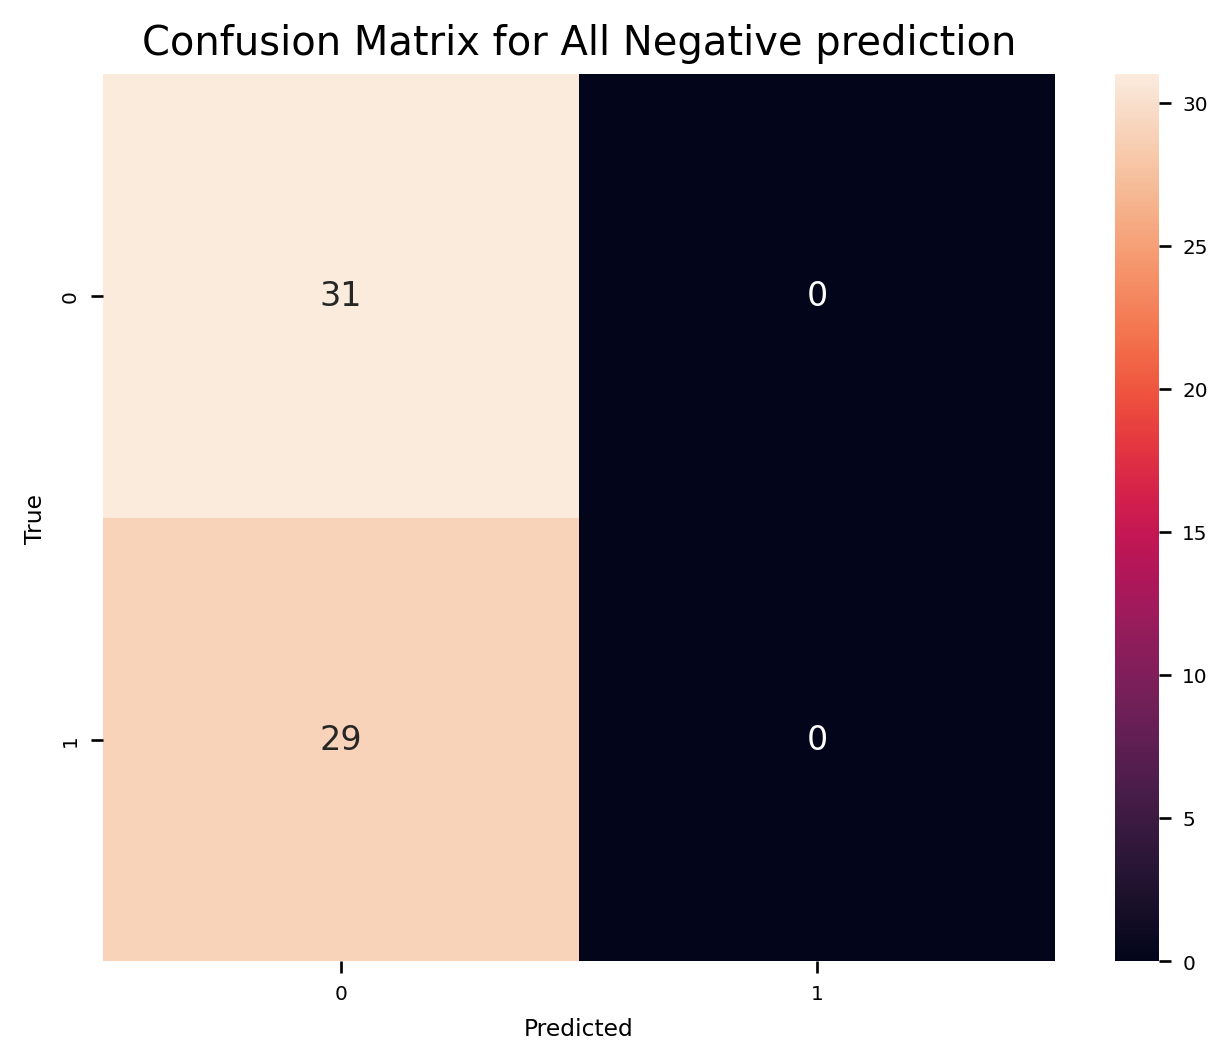

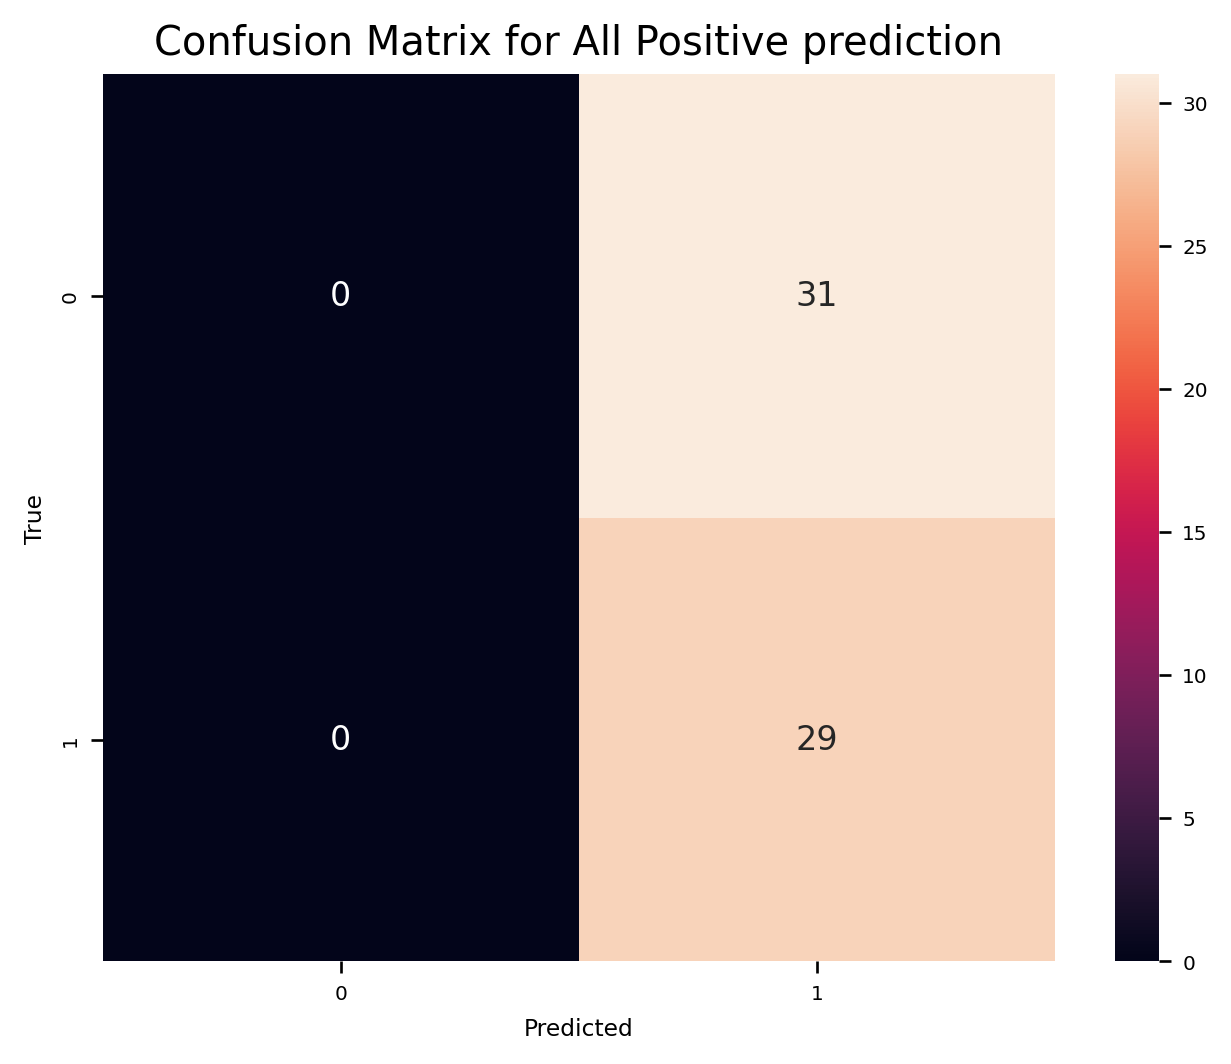

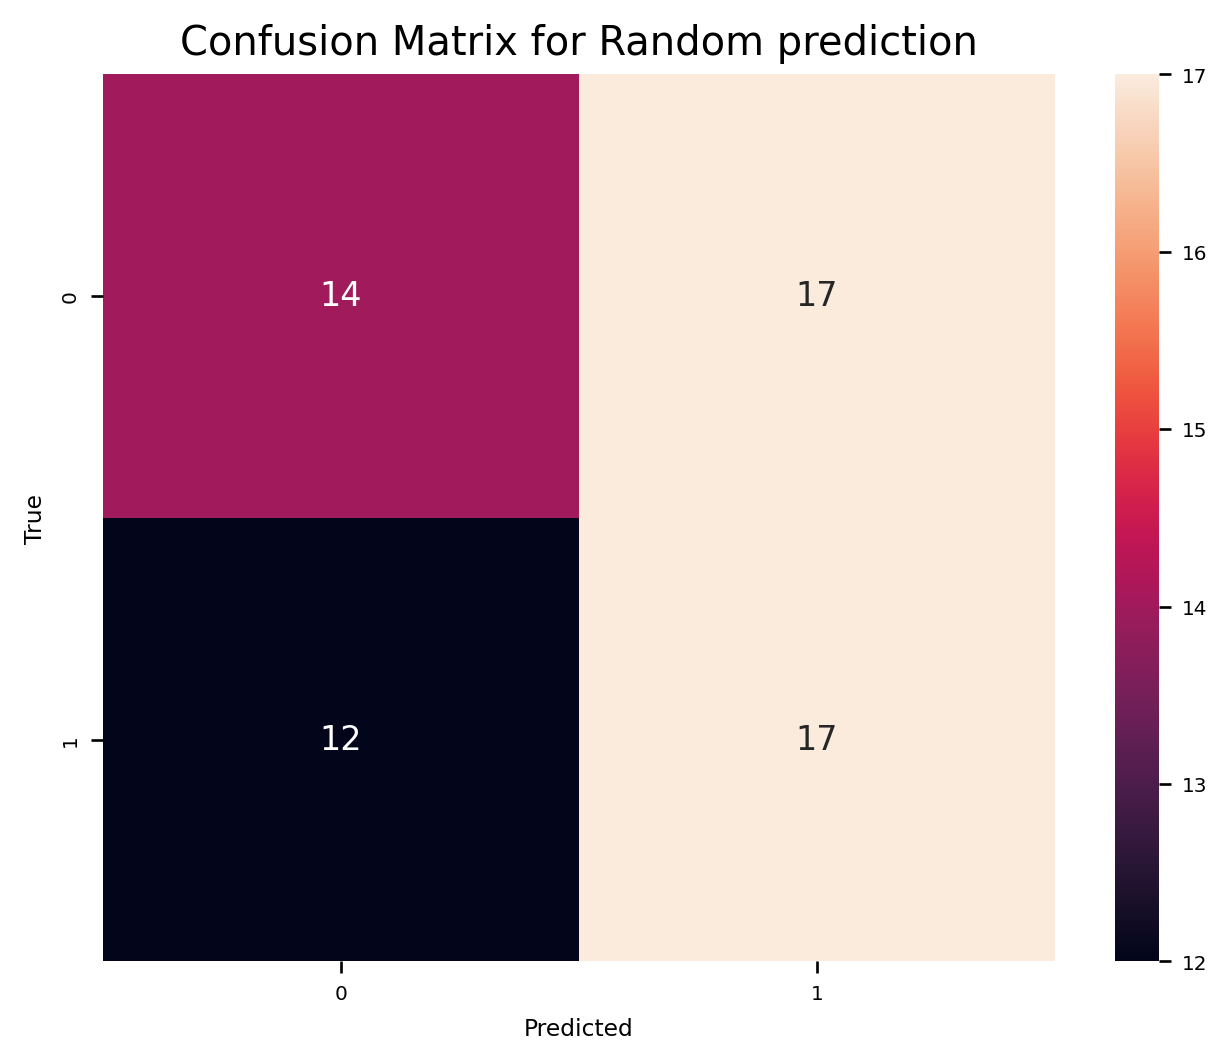

In [134]:
def heat_map(y_true, y_pred, name):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True)
    plt.title(f'Confusion Matrix for {name} prediction')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

heat_map(y_test, all_negative, 'All Negative')
heat_map(y_test, all_positive, 'All Positive')
heat_map(y_test, random_prediction, 'Random')

### 2.3 Choose a performance metric [0.5 marks]

Based on the above baseline tests and the client's requirements, **choose a performance metric** to use for evaluating/driving your machine learning methods.  **Give a reason for your choice.**

In [93]:
# Your answer here

# For the all-negative prediction:
# We can see that all the metric are 0 or 0.5, this is as expected, as this approach does not have any true positives or false positives. 
# Hence, metrics that need TP or FP in their computation all become zero. 
# The AUC and Balanced Accuracy are 0.5, indicating that this approach is no better than random guessing.

# For the all-positive prediction:
# The recall is 1, yhis is as expected. 
# The F1 score (0.65) try to balance precision and recall. 
# The F0.1 score, which gives more importance to precision, at about 0.49. This reflects our relatively low precision. 
# The F10 score, which gives more importance to recall, is very high, at about 0.99, reflecting recall = 1. 
# The AUC and Balanced Accuracy are 0.5, again indicating a performance no better than random guessing.

# For the random prediction:
# the Balanced Accuracy, AUC, F1 Score, F0.1 Score, and F10 Score are all above 0.5, 
# indicating a performance slightly better than random guessing.

# I will chose F-beta score (1 < beta < 10)
# the client's requirements:
# - for high recall (with a minimum of 95% detection rate for malignant cases)
# - reasonable precision (no more than 1 in 10 healthy cases labelled as malignant), 
# The model needs to be carefully designed and trained to balance these needs, beta < 1 lends more weight to precision.
# Hence metrics such as F-beta score (1 < beta < 10) could be useful.

### 2.4 SGD baseline [1 mark]

For a stronger baseline, **train and evaluate** the Stochastic Gradient Descent classifier (as seen in workshop 5). For this baseline case use the default settings for all the hyperparameters.

In [128]:
# Your code here
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

sgd = make_pipeline(preprocessing, SGDClassifier())
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

# Print the evaluation metrics
print('Accuracy score:', accuracy_score(y_test, y_pred))

Accuracy score: 0.9333333333333333


### 2.5 Confusion matrix [1 mark]

Calculate and display the normalized version of the confusion matrix.  From this **calculate the _probability_ that a sample from a person with a malignant tumour is given a result that they do not have cancer.  Which of the client's two criteria does this relate to, and is this baseline satisfying this criterion or not?**

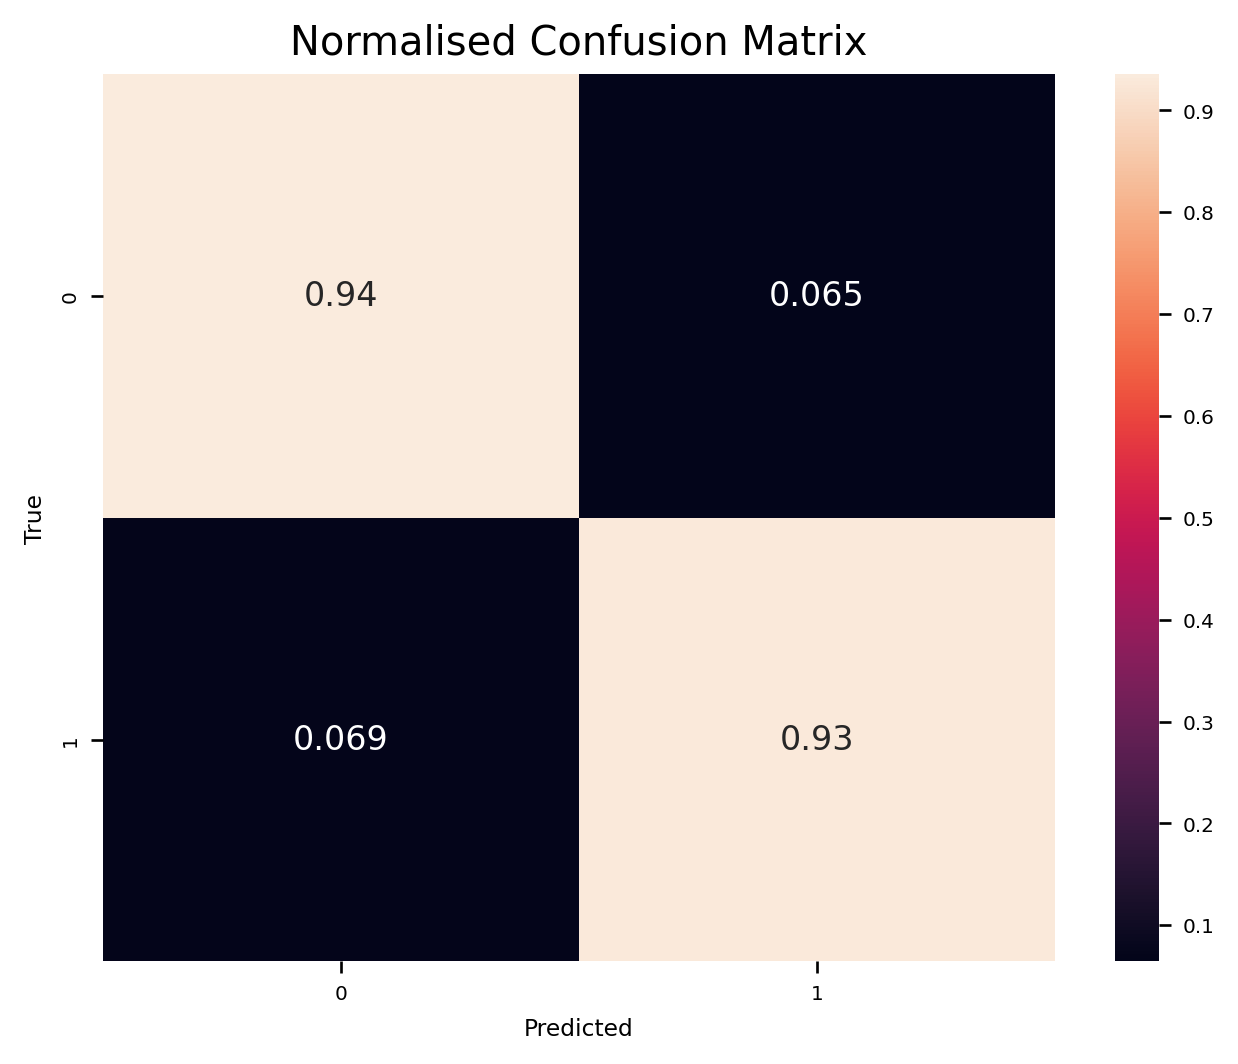

In [131]:
# Calculate normalized confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_pred, normalize='true')
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalised Confusion Matrix')
plt.show()

In [132]:
# Normalise the confusion matrix
fn_rate = cm[1, 0]

print(f'False Negative Rate: {fn_rate}')

False Negative Rate: 0.06896551724137931


In [97]:
# Your answer here

# the probability that a sample from a person with a malignant tumour is given a result that they do not have cancer is
# relate to criteria have at least a 95% probability of detecting malignant cancer when it is present.
# This baseline (0.9333) does not satisfying this criterion.

### 2.6 Main classifier [11 marks]

**Train and optimise the hyperparameters** to give the best performance for **each of the following classifiers**:
 - KNN (K-Nearest Neighbour) classifier
 - Decision tree classifier
 - Support vector machine classifier
 - SGD classifier
 
Follow best practice as much as possible here. You must make all the choices and decisions yourself, and strike a balance between computation time and performance.

You can use any of the sci-kit learn functions in sklearn.model_selection.cross* and anything used in workshops 3, 4, 5 and 6. Other hyper-parameter optimisation functions apart from these cannot be used (even if they are good and can be part of best practice in other situations - for this assignment everyone should assume they only have very limited computation resources and limit themselves to these functions).

**Display the performance of the different classifiers and the optimised hyperparameters.**

**Based on these results, list the best 3 classifiers and indicate if you think any perform equivalently.**

In [98]:
# Your code here
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

knn = Pipeline([
        ('preprocessing', preprocessing),
        ('classifier', KNeighborsClassifier())
    ])

params_knn = {
            'classifier__n_neighbors': [3, 5, 7, 9, 11],
            'classifier__metric': ['euclidean', 'manhattan']
        }

grid_search = GridSearchCV(knn, params_knn,  cv=5, verbose=0, n_jobs=-1)
grid_search.fit(X_train, y_train)

print('knn Best Score', grid_search.best_score_, 'Best Params', grid_search.best_params_)


knn Best Score 0.9541666666666668 Best Params {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 9}


In [99]:
tree = Pipeline([
        ('preprocessing', preprocessing),
        ('classifier', DecisionTreeClassifier())
    ])

params_tree = {
            'classifier__criterion': ['gini', 'entropy'], 'classifier__max_depth': [None, 2, 5, 10],
        }

grid_search = GridSearchCV(tree, params_tree,  cv=5, verbose=0, n_jobs=-1)
grid_search.fit(X_train, y_train)

print('Tree Best Score', grid_search.best_score_, 'Best Params', grid_search.best_params_)

Tree Best Score 0.9166666666666666 Best Params {'classifier__criterion': 'gini', 'classifier__max_depth': 10}


In [100]:
svc = Pipeline([
        ('preprocessing', preprocessing),
        ('classifier', SVC())
    ])

params_svc = {'classifier__C': [0.1, 1, 10, 100], 'classifier__kernel': ['linear', 'poly', 'rbf']}

grid_search = GridSearchCV(svc, params_svc,  cv=5, verbose=0, n_jobs=-1)
grid_search.fit(X_train, y_train)

print('SVC Best Score', grid_search.best_score_, 'Best Params', grid_search.best_params_)

SVC Best Score 0.9583333333333334 Best Params {'classifier__C': 10, 'classifier__kernel': 'rbf'}


In [101]:
sgd = Pipeline([
        ('preprocessing', preprocessing),
        ('classifier', SGDClassifier())
    ])

params_sgd = {'classifier__loss': ['hinge', 'log_loss'], 
              'classifier__penalty': [None, 'l1', 'l2'],
              'classifier__early_stopping': [True, False],
              'classifier__warm_start': [True, False],
              }

grid_search = GridSearchCV(sgd, params_sgd,  cv=5, verbose=0, n_jobs=-1)
grid_search.fit(X_train, y_train)

print('Sgd Best Score', grid_search.best_score_, 'Best Params', grid_search.best_params_)

Sgd Best Score 0.9625 Best Params {'classifier__early_stopping': True, 'classifier__loss': 'hinge', 'classifier__penalty': 'l1', 'classifier__warm_start': False}


In [102]:
# Your answer here

# The three best classifiers based on their performance (score) are:

# Support Vector Machine (SVC) - Score: 0.958, Parameters: {'classifier__C': 10, 'classifier__kernel': 'rbf'}
# Sgd Best Score 0.9625 Best Params {'classifier__early_stopping': False, 'classifier__loss': 'log_loss', 'classifier__penalty': 'l1', 'classifier__warm_start': True}
# K-Nearest Neighbors (KNN) - Score: 0.954, Parameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 9}
# The SVC classifier and the KNN classifier have very close scores, indicating that their performance could be considered equivalent in this case.


### 2.7 Model selection [1 mark]

**Choose the best classifier** (as seen in workshops 3 to 6) and give details of your hyperparameter settings. **Explain the reason for your choice.**

In [103]:
# Your answer here

# We aim to maximize the accuracy of cancer detection, I would choose the Sgd classifier since it has the highest score.

# Sgd - Score: 0.9625
# Parameters: {'classifier__early_stopping': True, 'classifier__loss': 'hinge', 'classifier__penalty': 'l1', 'classifier__warm_start': False}

### 2.8 Final performance [1.5 marks]

**Calculate and display an unbiased performance measure that you can present to the client.**

**Is your chosen classifier underfitting or overfitting?**

**Does your chosen classifier meet the client's performance criteria?**

In [115]:
# Your code here

Sgd_optimized = Pipeline([
    ('preprocessor', preprocessing),
    ('classifier', SGDClassifier(early_stopping = True, 
                                 loss = 'hinge', 
                                 penalty = 'l1', 
                                 warm_start= False))
])

Sgd_optimized.fit(X_train, y_train)

# Predict on the test set
y_test_pred = Sgd_optimized.predict(X_test)
print('Accuracy score:', accuracy_score(y_test, y_test_pred))


Accuracy score: 0.95


In [105]:
cm = confusion_matrix(y_test, y_test_pred, normalize='true')
fp_rate = cm[0, 1]
print("False positive rate:", fp_rate)

False positive rate: 0.06451612903225806


In [106]:
# Your answers here
# 
# The classifier I choose is overfitting because it has 96.25% accuracy on training set but 95% on test set.
# It satisify both of the criteria.

## 3. Decision Boundaries (15% = 4.5 marks)

### 3.1 Rank features [1 mark]

Although it is only possible to know the true usefulness of a feature when you've combined it with others in a machine learning method, it is still helpful to have some measure for how discriminative each feature is on its own.  One common method for doing this is to calculate a T-score (often used in statistics, and in the LDA machine learning method) for each feature.  

The formula for the T-score is (mean(x2) - mean(x1))/(0.5*(stddev(x2) + stddev(x1))), where x1 and x2 are the datasets corresponding to the two classes. Large values for the T-score (either positive or negative) indicate discriminative ability.

**Calculate the T-score for each feature and print out the best 4 features according to this score.**

In [107]:
# Your code here
df = pd.read_csv('assignment2.csv')
malignant = df[df['label'] == 'malignant']
benign = df[df['label'] == 'benign']

t_scores = []

for feature in df.columns:
    if feature != 'label':
        mean_malignant = np.mean(malignant[feature])
        mean_benign = np.mean(benign[feature])
        stddev_malignant = np.std(malignant[feature])
        stddev_benign = np.std(benign[feature])

        t_score = (mean_malignant - mean_benign) / (0.5 * (stddev_malignant + stddev_benign))
        t_scores.append([feature, t_score])

t_scores.sort(key=lambda x: abs(x[1]), reverse=True)
print(t_scores[:4])

[['worst concave points', 2.495528853810555], ['worst perimeter', 2.4814395467315733], ['worst radius', 2.418995524549576], ['mean concave points', 2.2369776759406075]]


### 3.2 Visualise decision boundaries [2.5 marks]

**Display the decision boundaries** for each pair of features from the best 4 chosen above.  You can use the DecisionBoundaryDisplay function (as per workshop 6).

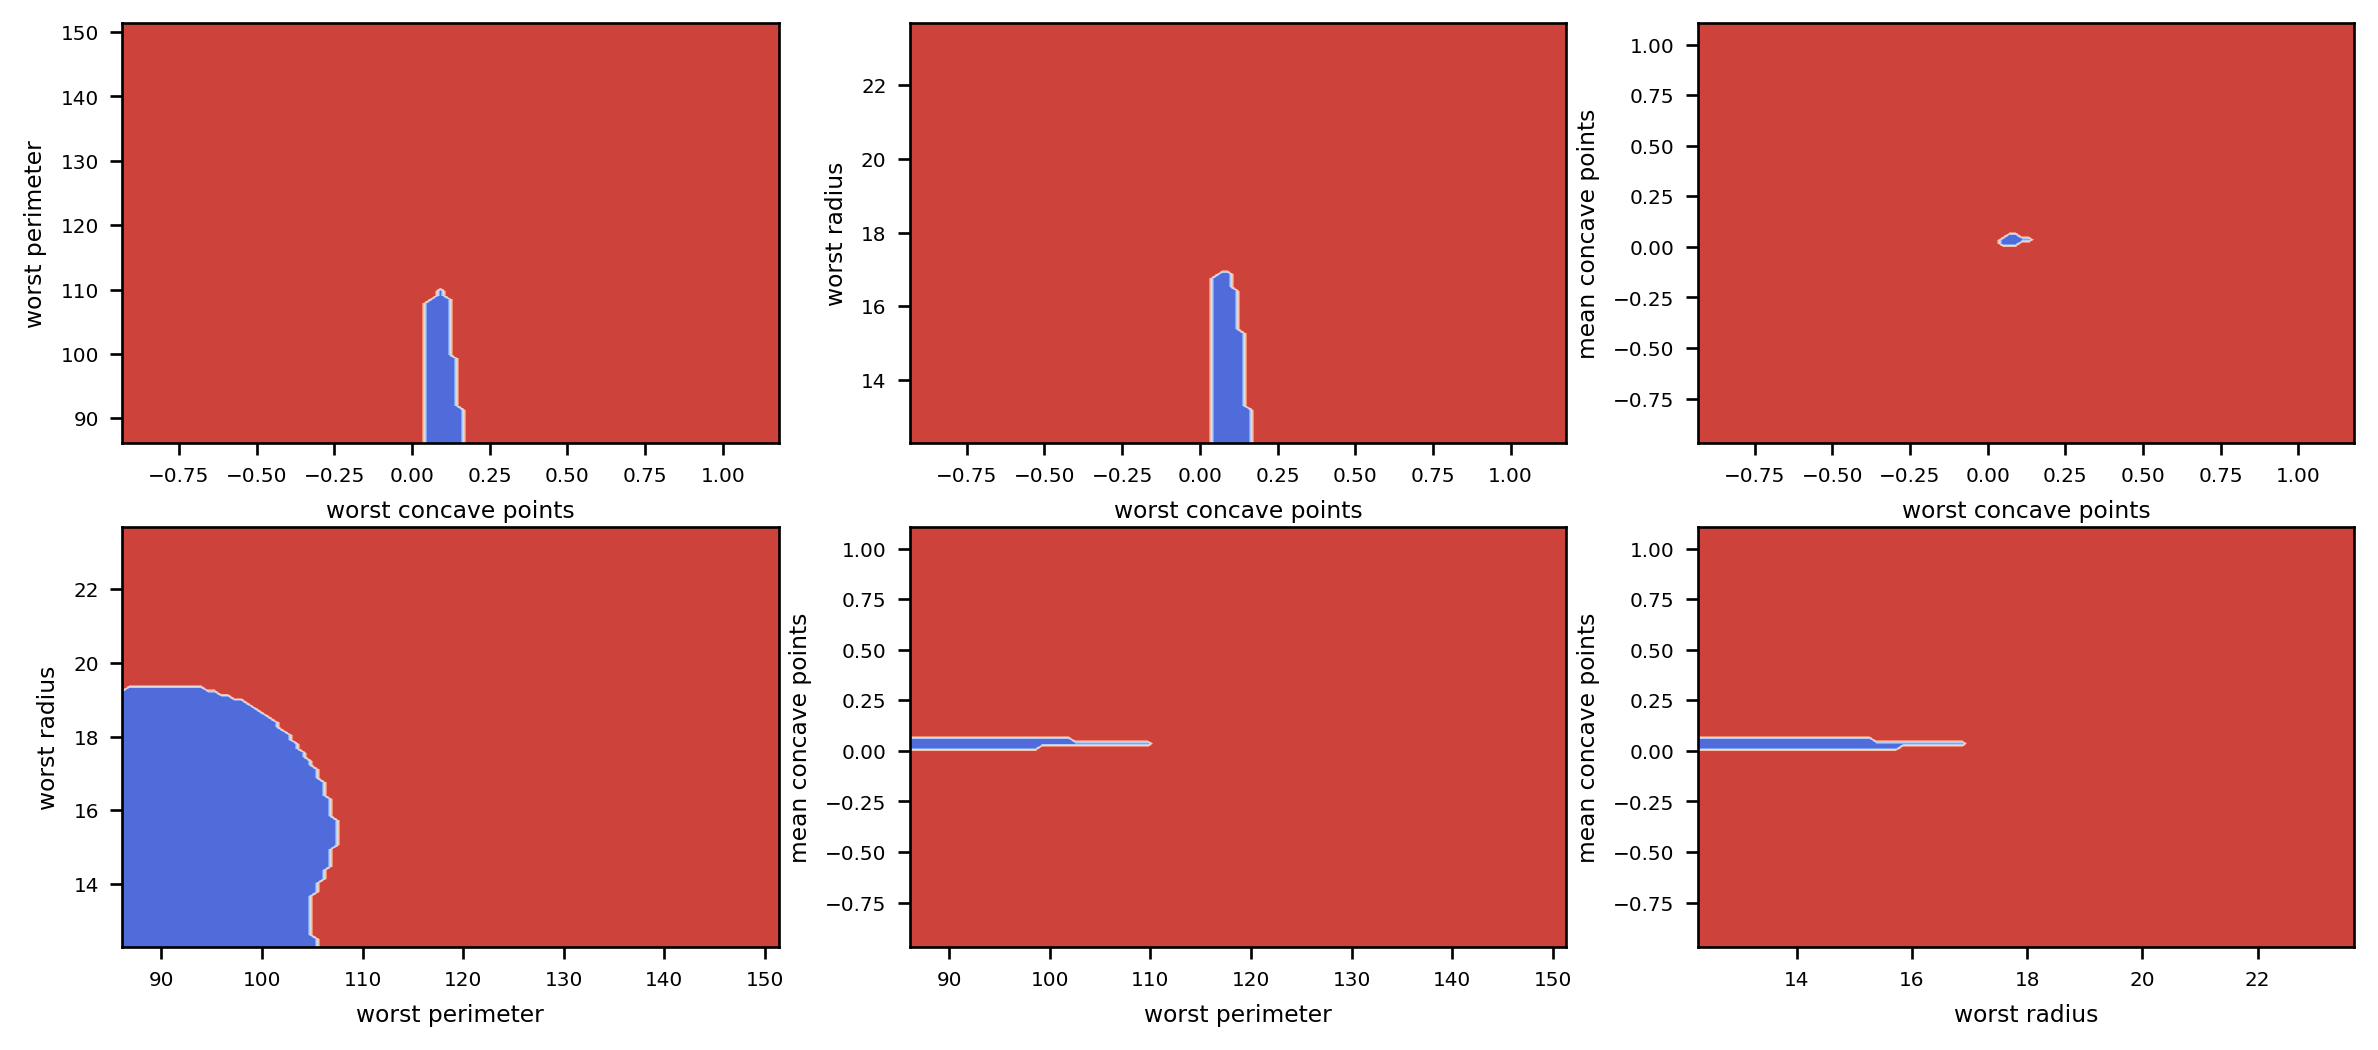

In [108]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Define feature pairs
feature_pairs = [('worst concave points', 'worst perimeter'),
                 ('worst concave points', 'worst radius'),
                 ('worst concave points', 'mean concave points'),
                 ('worst perimeter', 'worst radius'),
                 ('worst perimeter', 'mean concave points'),
                 ('worst radius', 'mean concave points')]

fig, axes = plt.subplots(2, 3, figsize=(12, 5))

for i, pair in enumerate(feature_pairs):
    X_pair = df[list(pair)]
    y_pair = df['label']
    
    # Create and fit the model
    model = make_pipeline(StandardScaler(), SVC(C=10, kernel='rbf'))
    model.fit(X_pair, y_pair)
    
    # Create the decision boundary display
    disp = DecisionBoundaryDisplay.from_estimator(model, X=X_pair, 
                                                  response_method="predict", 
                                                  cmap=plt.cm.coolwarm,
                                                  ax = axes[i//3][i%3]
                                                  )

    plt.xlabel(pair[0])
    plt.ylabel(pair[1])

plt.show()


### 3.3 Interpretation [1 mark]

From the decision boundaries displayed above, **would you expect the method to extrapolate well or not**?  Give reasons for your answer.

In [109]:
# Your answer here
# From above graph, the boundaries are very irregular or complex, it suggests that the model might be 
# overfitting to the training data and might not generalize well.

# I expect the method SVC(C=10, kernel='rbf') to be extrapolate not well, because the figure shows the model is 
# sensitivity to small changes in feature values. Espcailly the worst raidus v.s. mean concave points and
# worst perimeter v.s. mean concave points.


## 4. Second Round (15% = 4.5 marks)

After presenting your initial results to the client they come back to you and say that they have done some financial analysis and it would save them a lot of time and money if they did not have to analyse every cell, which is needed to get the "worst" features. Instead, they can quickly get accurate estimates for the "mean" and "standard error" features from a much smaller, randomly selected set of cells.

They ask you to **give them a performance estimate for the same problem, but without using any of the "worst" features.**



### 4.1 New estimate [3.5 marks]

**Calculate an unbiased performance estimate** for this new problem, as requested by the client.

In [119]:
# Your code here

mean_features = [f for f in df.columns if 'mean' in f]
std_error_features = [f for f in df.columns if 'error' in f]

# Extract only the mean and standard error features
X_new = df[mean_features + std_error_features]
y_new = df['label']

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42, stratify=y_new)
label_mapping = {'benign': 0, 'malignant': 1}

# Apply the mapping to the label column
y_test = y_test.map(label_mapping)
y_train = y_train.map(label_mapping)

svc_2 = Pipeline([
    ('preprocessor', preprocessing),
    ('classifier', SGDClassifier(early_stopping = False, 
                                 loss = 'log_loss', 
                                 penalty = 'l1', 
                                 warm_start= True))
])

svc_2.fit(X_train, y_train)
y_test_pred = svc_2.predict(X_test)
print('Accuracy score:', accuracy_score(y_test, y_test_pred))

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
fp_rate = fp / (fp + tn)
print("False positive rate:", fp_rate)


Accuracy score: 0.95
False positive rate: 0.0967741935483871


### 4.2 Performance difference [1 mark]

Do you think the new classifier, that does not use the "worst" features, is:
 - **as good as the previous classifier** (that uses all the features)
 - **better than the previous classifier**
 - **worse than the previous classifier**
 
Give reasons for your answer.

In [111]:
# Your answer here

# The classifier without the "worst" features performs worse than the previous classifier.

# The overall accuracy score for both models is the same (0.95). 
# However, the false-positive rate is higher in the classifier without the "worst" features (0.0967 compared to 0.0645). 
# The false positive rate is critical in this case because it measures the proportion of healthy cases incorrectly labeled as malignant, 
# and the client's requirements is to "have no more than 1 in 10 healthy cases labelled as positive", 